# Data Importing and Data Preprocessing

In [1]:
# Importing neccessary libraries and packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Loading the Wisconsin (Diagnostic) dataset

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

In [3]:
# Creating a Pandas Dataframe

df=pd.DataFrame(X, columns = feature_names)
df['target'] = y

In [4]:
# Displaying the shape of the dataframe, i.e Number of rows and columns in the Dataframes

df.shape

(569, 31)

In [5]:
# Checking the uniques values in the target column to ensure that there is no class imbalance

df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [6]:
# Cheking Null Values in each column

df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size =0.2, random_state=42)

## Model Training and Evaluation

In [8]:
# Initialisng the Model

decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100)
ada_boost = AdaBoostClassifier(n_estimators=100)

In [9]:
# Model Training

decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [10]:
# Making Predictions on the test data

y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_ab = ada_boost.predict(X_test)

In [11]:
# Calculating accuracy for the algorithms

accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_ab = accuracy_score(y_test, y_pred_ab)

In [12]:
# Displaying the accuracy for the algorithms

print("Accuracy score for Decision Tree Classifier is: {:.2f}%".format(accuracy_dt*100))
print("Accuracy score for Random Forest Classifier is: {:.2f}%".format(accuracy_rf*100))
print("Accuracy score for Ada Boost Classifier is: {:.2f}% ".format(accuracy_ab*100))

Accuracy score for Decision Tree Classifier is: 94.74%
Accuracy score for Random Forest Classifier is: 96.49%
Accuracy score for Ada Boost Classifier is: 97.37% 


In [13]:
# Creating confusion matrices for the algorithms

cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_ab = confusion_matrix(y_test, y_pred_ab)

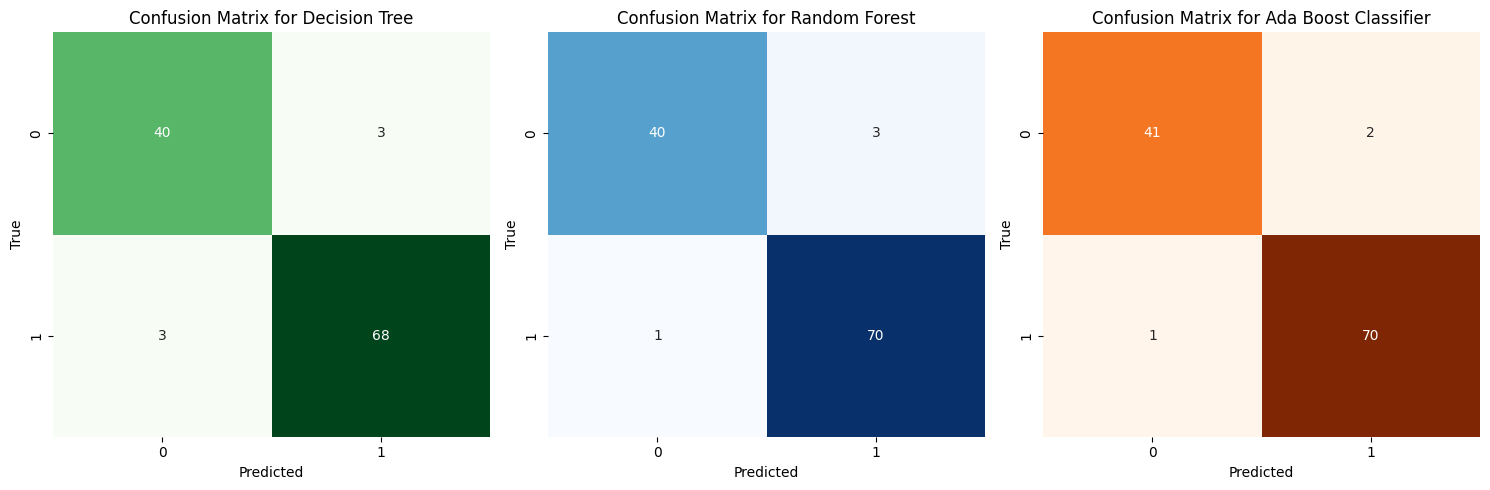

In [14]:
# Visualsing the Confusion Matrices

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.heatmap(cm_dt, annot=True, cbar=False,fmt='d',cmap='Greens')
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1,3,2)
sns.heatmap(cm_rf, annot=True, cbar=False, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1,3,3)
sns.heatmap(cm_ab, annot=True, cbar=False, cmap="Oranges")
plt.title("Confusion Matrix for Ada Boost Classifier")
plt.xlabel('Predicted')
plt.ylabel("True")

plt.tight_layout()
plt.show()

Above confusion matrices show that AdaBoost Classifier has the best classification abilities here but the difference between Random Fores and AdaBoost is not significant. Decision Tree algorithm perfomred slightly poor when compared with Ensemble approaches like Random Forest and AdaBoost as reflected in the accuracy and Confusion Matrices.